# SUPPORT VECTOR MACHINES: INCOME DATASET

## Q1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 

## Q2. Import dataset

In [2]:
a=pd.read_csv("D://ML_Lab//pulsar_data.csv")

## Q3. Explore the data to gain insights about the data

In [3]:
a.shape

(12528, 9)

In [4]:
a.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [5]:
a.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
a.columns=a.columns.str.strip()
a.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [7]:
a.rename(columns={
    'Mean of the integrated profile': 'mean_integrated_profile',
    'Standard deviation of the integrated profile': 'std_dev_integrated_profile',
    'Excess kurtosis of the integrated profile': 'excess_kurtosis_integrated_profile',
    'Skewness of the integrated profile': 'skewness_integrated_profile',
    'Mean of the DM-SNR curve': 'mean_dmsnr_curve',
    'Standard deviation of the DM-SNR curve': 'std_dev_dmsnr_curve',
    'Excess kurtosis of the DM-SNR curve': 'excess_kurtosis_dmsnr_curve',
    'Skewness of the DM-SNR curve': 'skewness_dmsnr_curve'
}, inplace=True)


In [8]:
a.columns

Index(['mean_integrated_profile', 'std_dev_integrated_profile',
       'excess_kurtosis_integrated_profile', 'skewness_integrated_profile',
       'mean_dmsnr_curve', 'std_dev_dmsnr_curve',
       'excess_kurtosis_dmsnr_curve', 'skewness_dmsnr_curve', 'target_class'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x1c5f59305e0>,
 [Text(-1.0543406083257068, 0.31363335542537385, '0'),
  Text(1.0543405863023487, -0.31363342946124195, '>1')],
 [Text(-0.5750948772685672, 0.17107273932293116, '91%'),
  Text(0.5750948652558264, -0.17107277970613194, '9%')])

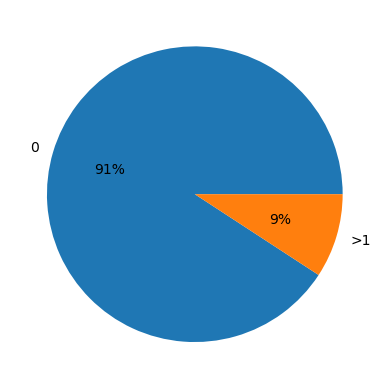

In [9]:
plt.pie(a['target_class'].value_counts()/len(a)*100,labels=['0','>1'],autopct='%1.0f%%')

In [10]:
a.describe()

,mean_integrated_profile,std_dev_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr_curve,std_dev_dmsnr_curve,excess_kurtosis_dmsnr_curve,skewness_dmsnr_curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [11]:
a.isnull().sum()

mean_integrated_profile                  0
std_dev_integrated_profile               0
excess_kurtosis_integrated_profile    1735
skewness_integrated_profile              0
mean_dmsnr_curve                         0
std_dev_dmsnr_curve                   1178
excess_kurtosis_dmsnr_curve              0
skewness_dmsnr_curve                   625
target_class                             0
dtype: int64

In [12]:
a.isnull().sum()/len(a)*100

mean_integrated_profile                0.000000
std_dev_integrated_profile             0.000000
excess_kurtosis_integrated_profile    13.848978
skewness_integrated_profile            0.000000
mean_dmsnr_curve                       0.000000
std_dev_dmsnr_curve                    9.402937
excess_kurtosis_dmsnr_curve            0.000000
skewness_dmsnr_curve                   4.988825
target_class                           0.000000
dtype: float64

In [13]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   mean_integrated_profile             12528 non-null  float64
 1   std_dev_integrated_profile          12528 non-null  float64
 2   excess_kurtosis_integrated_profile  10793 non-null  float64
 3   skewness_integrated_profile         12528 non-null  float64
 4   mean_dmsnr_curve                    12528 non-null  float64
 5   std_dev_dmsnr_curve                 11350 non-null  float64
 6   excess_kurtosis_dmsnr_curve         12528 non-null  float64
 7   skewness_dmsnr_curve                11903 non-null  float64
 8   target_class                        12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [14]:
a=a.replace('?',np.nan)

In [15]:
a['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

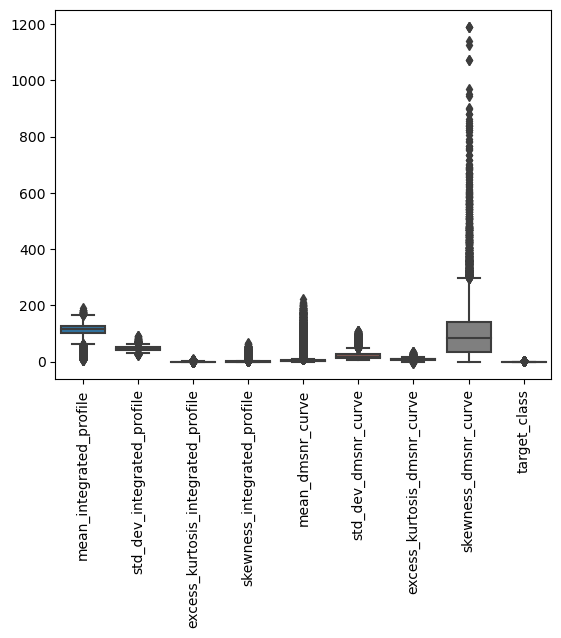

In [16]:
sns.boxplot(data=a)
plt.xticks(rotation=90)
plt.show()

In [17]:
a.head()

,mean_integrated_profile,std_dev_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr_curve,std_dev_dmsnr_curve,excess_kurtosis_dmsnr_curve,skewness_dmsnr_curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


## Q4. Check the distribution of variables

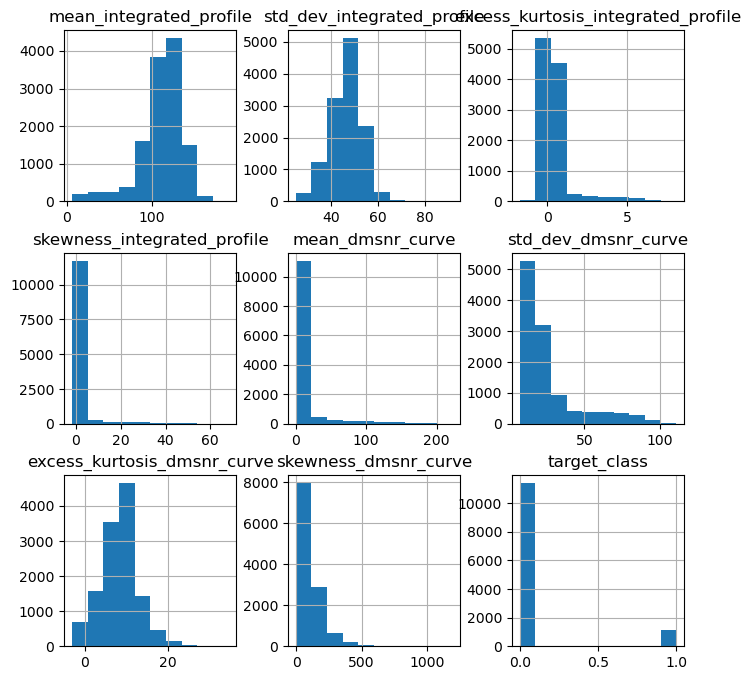

In [18]:
a.hist(figsize=(8,8))
plt.show()

## Q5. Impute missing categorical variables with the most frequent value

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
a['excess_kurtosis_integrated_profile']=imputer.fit_transform(a[['excess_kurtosis_integrated_profile']])
a['std_dev_dmsnr_curve']=imputer.fit_transform(a[['std_dev_dmsnr_curve']])
a['skewness_dmsnr_curve']=imputer.fit_transform(a[['skewness_dmsnr_curve']])

C:\Users\91770\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\91770\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

In [20]:
a.isnull().sum()/len(a)*100

mean_integrated_profile               0.0
std_dev_integrated_profile            0.0
excess_kurtosis_integrated_profile    0.0
skewness_integrated_profile           0.0
mean_dmsnr_curve                      0.0
std_dev_dmsnr_curve                   0.0
excess_kurtosis_dmsnr_curve           0.0
skewness_dmsnr_curve                  0.0
target_class                          0.0
dtype: float64

## Q6. Feature Scaling

In [21]:
y=a['target_class']
a.drop('target_class',axis=1,inplace=True)

In [22]:
x=a
x

,mean_integrated_profile,std_dev_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr_curve,std_dev_dmsnr_curve,excess_kurtosis_dmsnr_curve,skewness_dmsnr_curve
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,7.370432,2.958066,7.197842
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128
...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143
12524,115.617188,46.784600,0.218177,0.226757,6.140468,7.370432,5.732201,34.357283
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018


In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.39398903,  0.27225212,  0.1631161 , ..., -0.31675259,
        -0.19481754, -0.3656857 ],
       [-1.32725743, -1.52127273,  0.43302828, ..., -0.35929842,
         0.23837256, -0.22035503],
       [ 0.76130595,  0.98636783, -0.03053182, ..., -0.11319969,
         0.038556  , -0.33136058],
       ...,
       [ 0.19435365, -0.48635278,  0.39347723, ..., -0.66452854,
         1.92294752,  0.59011047],
       [ 0.95911539,  0.50175114, -0.20919853, ..., -0.15742391,
        -0.20616758, -0.37661647],
       [ 0.37725131,  0.58093396,  0.13967243, ..., -0.65608207,
         2.05677923,  0.65721173]])

## Q6. Split data into separate training and test set

In [24]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2,random_state=42)

## Q7. Run SVM with default hyperparameters 
 ##   Run SVM with rbf kernel and C=1.0 and gamma=auto 
 ##   Run SVM with rbf kernel and C=100.0
 ##   Run SVM with rbf kernel and C=1000.0

In [25]:
clf1 = svm.SVC()
clf2=svm.SVC(kernel='rbf',C=1,gamma='auto')
clf3=svm.SVC(kernel='rbf',C=100)
clf4=svm.SVC(kernel='rbf',C=1000)

## Q8. Run SVM with linear kernel
##    Run SVM with linear kernel and C=1.0
 ##   Run SVM with linear kernel and C=100.0
 ##   Run SVM with linear kernel and C=1000.0

In [26]:
clf5 = svm.SVC(kernel='linear')
clf6=svm.SVC(kernel='linear',C=1)
clf7=svm.SVC(kernel='linear',C=100)
clf8=svm.SVC(kernel='linear',C=1000)

## Q9. Run SVM with polynomial kernel
 ##   Run SVM with polynomial kernel and C=1.0
 ##   Run SVM with polynomial kernel and C=100.0
 ##   Run SVM with polynomial kernel and C=1000.0

In [27]:
clf9 = svm.SVC(kernel='polynomial')
clf10=svm.SVC(kernel='polynomial',C=1)
clf11=svm.SVC(kernel='polynomial',C=100)
clf12=svm.SVC(kernel='polynomial',C=1000)

## Q10. Run SVM with sigmoid kernel 
##    Run SVM with sigmoid kernel and C=1.0
 ##   Run SVM with sigmoid kernel and C=100.0
 ##   Run SVM with sigmoid kernel and C=1000.0

In [28]:
clf13 = svm.SVC(kernel='sigmoid')
clf14=svm.SVC(kernel='sigmoid',C=1)
clf15=svm.SVC(kernel='sigmoid',C=100)
clf16=svm.SVC(kernel='sigmoid',C=1000)

## Q11. Compare the train-set and test-set accuracy
## Q12. Check for overfitting and underfitting

In [29]:
classifiers = [
    svm.SVC(),
    svm.SVC(kernel='rbf', C=100),
    svm.SVC(kernel='rbf', C=1000),
    svm.SVC(kernel='sigmoid'),
    svm.SVC(kernel='sigmoid', C=1),
    svm.SVC(kernel='sigmoid', C=100),
    svm.SVC(kernel='sigmoid', C=1000)
]

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score

In [31]:
evaluation_results = []
j=1
for i, clf in enumerate(classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.decision_function(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    error = 1 - accuracy
    roc_auc = roc_auc_score(y_test, y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    evaluation_results.append({
        "model": f"Model {i+1}",
        "confusion_matrix": cm,
        "classification_report": cr,
        "train_accuracy": clf.score(X_train, y_train),
        "test_accuracy": clf.score(X_test, y_test),
        "classification_accuracy": accuracy,
        "classification_error": error,
        "roc_auc": roc_auc,
        "roc_curve": (fpr, tpr)
    })
    print("model {} completed".format(j))
    j+=1


model 1 completed
model 2 completed
model 3 completed
model 4 completed
model 5 completed
model 6 completed
model 7 completed


In [32]:
i=1
for result in evaluation_results:
    print("model {}".format(i))
    print(f"Train Accuracy: {result['train_accuracy']:.2f}")
    print(f"Test Accuracy : {result['test_accuracy']:.2f}")
    i+=1

model 1
Train Accuracy: 0.98
Test Accuracy : 0.98
model 2
Train Accuracy: 0.99
Test Accuracy : 0.98
model 3
Train Accuracy: 0.99
Test Accuracy : 0.97
model 4
Train Accuracy: 0.87
Test Accuracy : 0.87
model 5
Train Accuracy: 0.87
Test Accuracy : 0.87
model 6
Train Accuracy: 0.87
Test Accuracy : 0.87
model 7
Train Accuracy: 0.87
Test Accuracy : 0.87


## Q13. visualize confusion matrix with seaborn heatmap

Model: Model 1
Confusion Matrix:


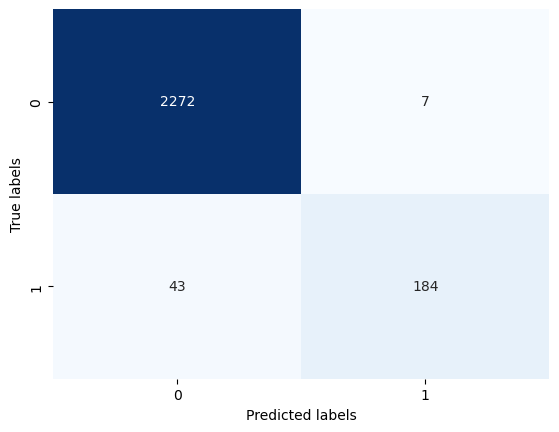

Model: Model 2
Confusion Matrix:


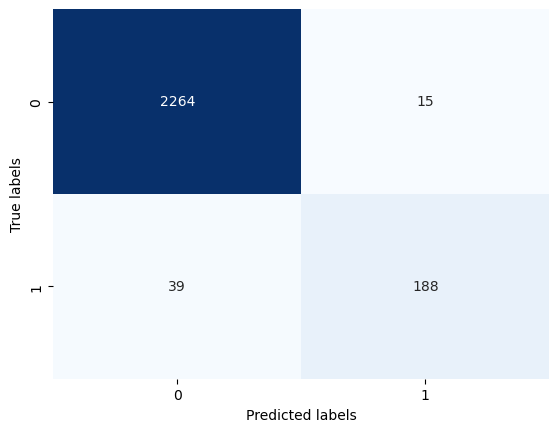

Model: Model 3
Confusion Matrix:


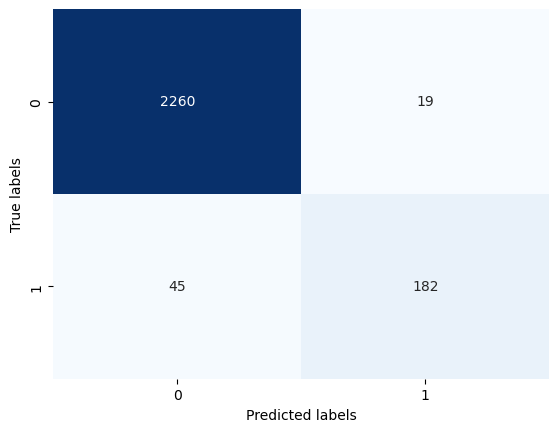

Model: Model 4
Confusion Matrix:


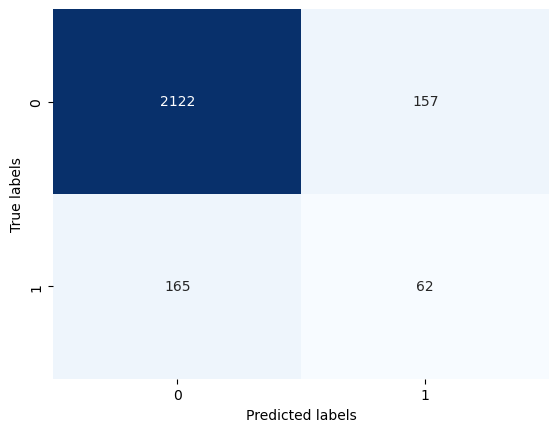

Model: Model 5
Confusion Matrix:


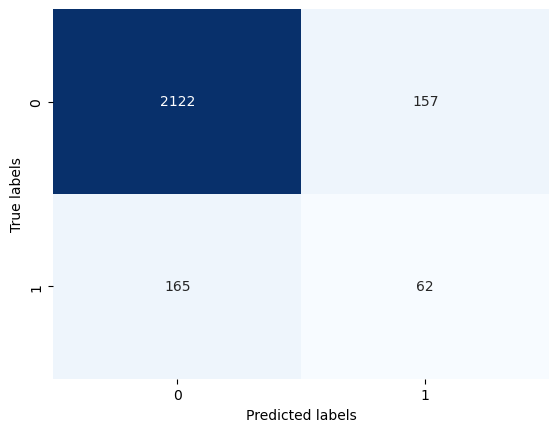

Model: Model 6
Confusion Matrix:


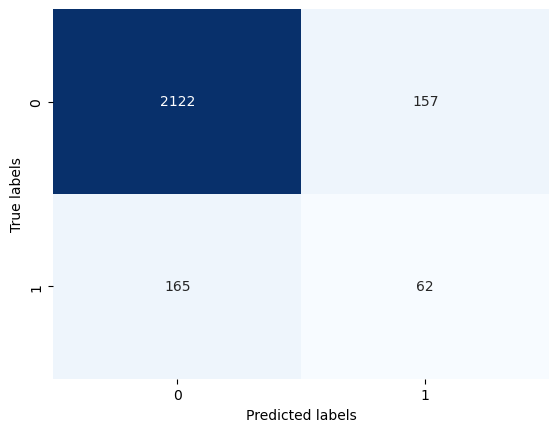

Model: Model 7
Confusion Matrix:


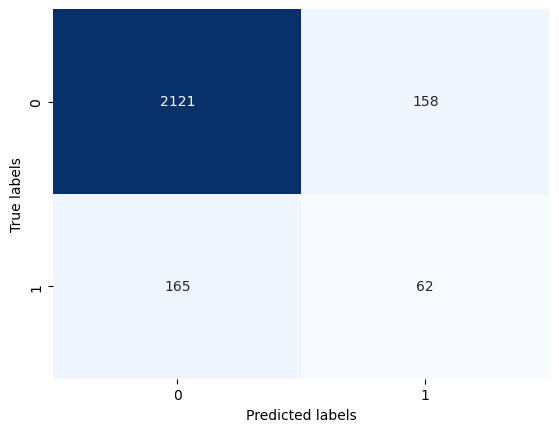

In [33]:
for result in evaluation_results:
    print(f"Model: {result['model']}")
    print("Confusion Matrix:")
    plt.figure()
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
   

## Q14. Generate classification report 

In [34]:
i=1
for result in evaluation_results:
    print("model {} Classification Report:".format(i))
    print(result['classification_report'])
    i+=1
    

model 1 Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2279
         1.0       0.96      0.81      0.88       227

    accuracy                           0.98      2506
   macro avg       0.97      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506

model 2 Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2279
         1.0       0.93      0.83      0.87       227

    accuracy                           0.98      2506
   macro avg       0.95      0.91      0.93      2506
weighted avg       0.98      0.98      0.98      2506

model 3 Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2279
         1.0       0.91      0.80      0.85       227

    accuracy                           0.97      2506
   macro avg       0.94      0.90  

## Q15. Evaluate classification accuracy
## Q16. Evaluate Classification error

In [35]:
i=1
for result in evaluation_results:
    print("model {}".format(i))
    print(f"Classification Accuracy: {result['classification_accuracy']:.2f}")
    print(f"Classification Error: {result['classification_error']:.2f}")
    i+=1
    

model 1
Classification Accuracy: 0.98
Classification Error: 0.02
model 2
Classification Accuracy: 0.98
Classification Error: 0.02
model 3
Classification Accuracy: 0.97
Classification Error: 0.03
model 4
Classification Accuracy: 0.87
Classification Error: 0.13
model 5
Classification Accuracy: 0.87
Classification Error: 0.13
model 6
Classification Accuracy: 0.87
Classification Error: 0.13
model 7
Classification Accuracy: 0.87
Classification Error: 0.13


## Q17. Plot ROC Curve
## Q18. Compute ROC AUC

model 1


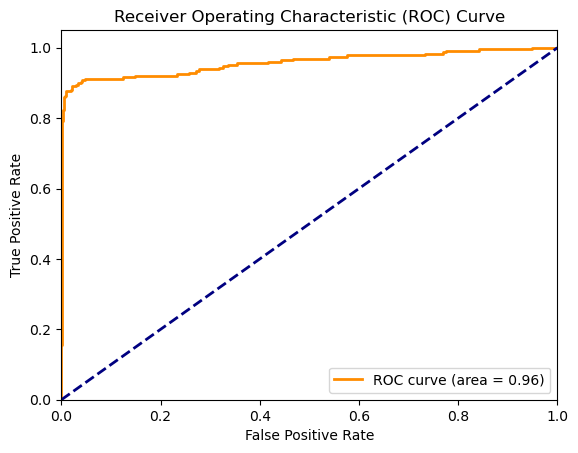

model 2


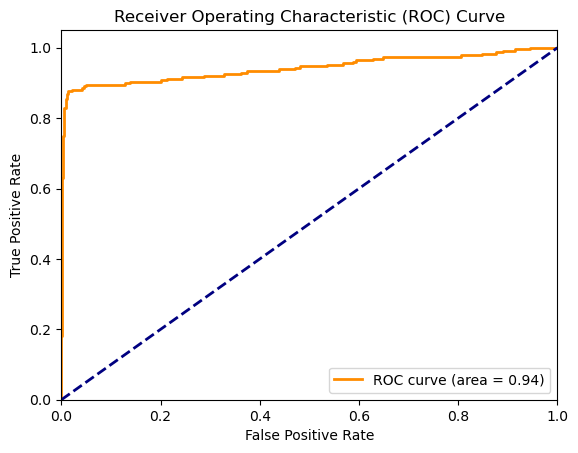

model 3


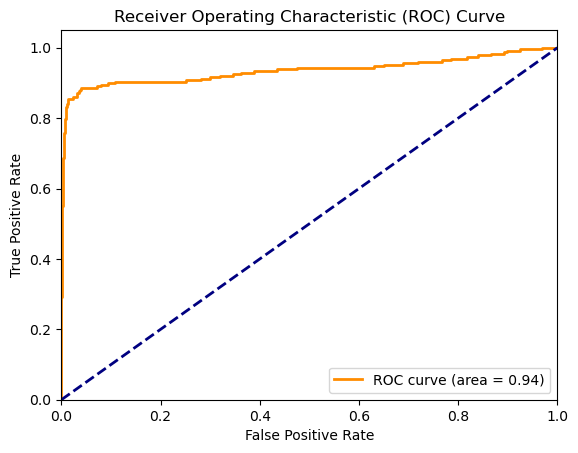

model 4


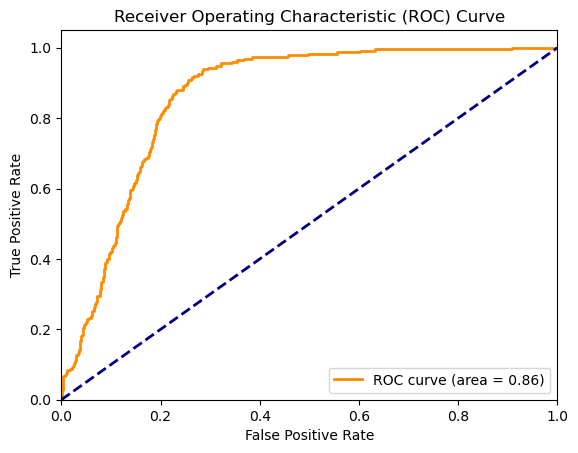

model 5


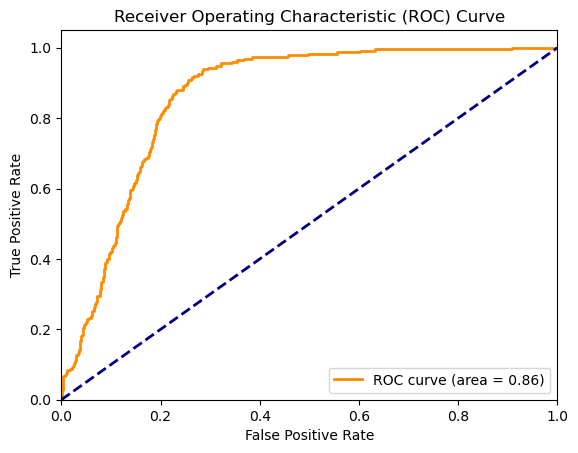

model 6


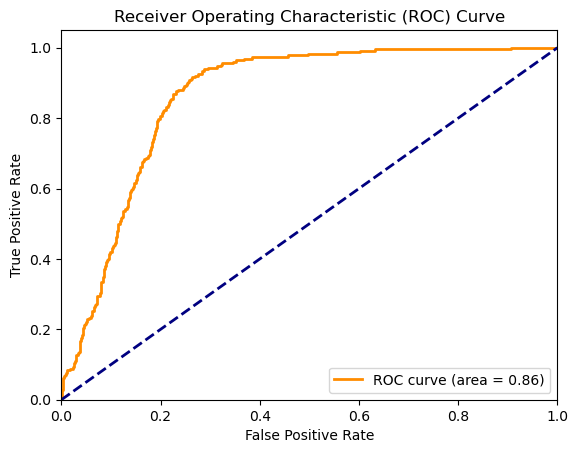

model 7


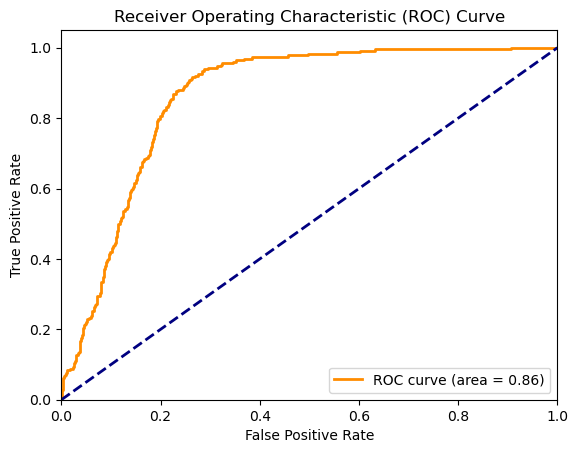

In [36]:
i=1
for result in evaluation_results:
    print("model {}".format(i))
    plt.figure()
    plt.plot(result['roc_curve'][0], result['roc_curve'][1], color='darkorange', lw=2, label=f'ROC curve (area = {result["roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    i+=1

In [37]:
i=1
for result in evaluation_results:
    print("model {}".format(i))
    print(result['roc_auc'])
    i+=1

model 1
0.9577641480439099
model 2
0.9423137514908193
model 3
0.9354883604950777
model 4
0.8623787773059132
model 5
0.8623787773059132
model 6
0.8620134420189702
model 7
0.8620134420189702


## Q19. Stratified k-fold cross-validation with shuffle split with rbf kernel

In [38]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn.svm import SVC
n_splits = 5
n_shuffles = 5
svm_rbf = SVC(kernel='rbf')
skf = StratifiedKFold(n_splits=n_splits)
sss = StratifiedShuffleSplit(n_splits=n_shuffles, test_size=0.2, random_state=42)

In [39]:
# Stratified k-fold cross-validation
cv_scores_skf = cross_val_score(svm_rbf, x, y, cv=skf)
print(f"Stratified k-fold cross-validation scores: {cv_scores_skf}")
print(f"Mean accuracy (k-fold): {cv_scores_skf.mean()}")

Stratified k-fold cross-validation scores: [0.96927374 0.971668   0.9688747  0.97205589 0.97045908]
Mean accuracy (k-fold): 0.9704662821205157


In [40]:
# Stratified shuffle split
cv_scores_sss = cross_val_score(svm_rbf, x, y, cv=sss)
print(f"Stratified shuffle split scores: {cv_scores_sss}")
print(f"Mean accuracy (shuffle split): {cv_scores_sss.mean()}")

Stratified shuffle split scores: [0.97086991 0.9688747  0.97565842 0.97047087 0.97206704]
Mean accuracy (shuffle split): 0.9715881883479648


## Q20. Stratified k-fold cross-validation with shuffle split with sigmoid kernel

In [41]:
svm_sigmoid = SVC(kernel='sigmoid')
# Stratified k-fold cross-validation
cv_scores_skf = cross_val_score(svm_sigmoid, x, y, cv=skf)
print(f"Stratified k-fold cross-validation scores: {cv_scores_skf}")
print(f"Mean accuracy (k-fold): {cv_scores_skf.mean()}")

Stratified k-fold cross-validation scores: [0.91739824 0.92378292 0.92537909 0.91497006 0.91257485]
Mean accuracy (k-fold): 0.9188210331133423


In [42]:
# Stratified shuffle split
cv_scores_sss = cross_val_score(svm_sigmoid, x, y, cv=sss)
print(f"Stratified shuffle split scores: {cv_scores_sss}")
print(f"Mean accuracy (shuffle split): {cv_scores_sss.mean()}")

Stratified shuffle split scores: [0.92059058 0.9405427  0.92258579 0.92617717 0.91819633]
Mean accuracy (shuffle split): 0.9256185155626497
